In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

## Exercício 1

In [2]:
df = pd.read_csv("data/velocities.txt", delimiter = "	", names = ["time", "velocity"])

In [3]:
df

,time,velocity
0,0,0.000000
1,1,0.069478
2,2,0.137694
3,3,0.204332
4,4,0.269083
...,...,...
96,96,0.223073
97,97,0.254244
98,98,0.283753
99,99,0.311479


In [4]:
df["total_distance"] = np.zeros(len(df["time"]))
sum = 0 
for i in range(1,101):
    sum += (df["velocity"][i] + df["velocity"][i-1])*(df["time"][i] - df["time"][i-1])/2
    df.loc[i,"total_distance"] += sum

In [5]:
df

,time,velocity,total_distance
0,0,0.000000,0.000000
1,1,0.069478,0.034739
2,2,0.137694,0.138325
3,3,0.204332,0.309338
4,4,0.269083,0.546045
...,...,...,...
96,96,0.223073,7.089258
97,97,0.254244,7.327916
98,98,0.283753,7.596915
99,99,0.311479,7.894531


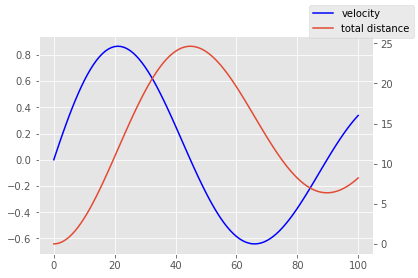

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.grid(False)

ax1.plot(df["time"], df["velocity"], color="b", label = "velocity")
ax2.plot(df["time"], df["total_distance"], label = "total distance")

fig.legend(loc ='upper right')

## Exercise 2

In [7]:
def funcao(x):
    return (x**4 - 2*x + 1)

In [8]:
def simpson(a,b,f,n):
    x = np.linspace(a,b,n+1)
    sum = 0
    for i,v in enumerate(x[0:n]):
        h = (x[i+1] - v)/2
        c = v + h
        sum += (f(v) + 4*f(c) + f(x[i+1]))*h/3
    return sum

sum = simpson(0,2,funcao, 10)
sum

4.400026666666667

In [9]:
print(f"erro absoluto = {abs(sum - 4.4)}")

erro absoluto = 2.6666666666841365e-05


In [10]:
print(simpson(0,2,funcao,100))
print(simpson(0,2,funcao,1000))

4.400000002666666
4.400000000000267


## Exercise 3

In [11]:
def f(x):
    return np.exp(-x**2)

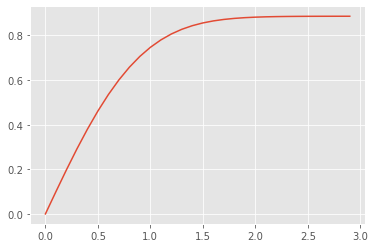

In [94]:
E_x = [simpson(0,x,f,100) for x in np.arange(0,3,0.1)]
fig, ax = plt.subplots()
ax.plot(np.arange(0,3,0.1), E_x)

## Exercise 4

In [13]:
def f2(t,xx,m):
    return np.cos(m*t-xx*np.sin(t))
    
def simpson2(a,b,f,n,xx,m):
    x = np.linspace(a,b,n)
    sum = 0
    for i,v in enumerate(x[0:n-1]):
        h = (x[i+1] - v)/2
        c = v + h
        sum += (f(v,xx,m) + 4*f(c,xx,m) + f(x[i+1],xx,m))*h/3
    return sum

def J(m,x):
    return (1/np.pi * simpson2(0,np.pi,f2,1000,x,m))

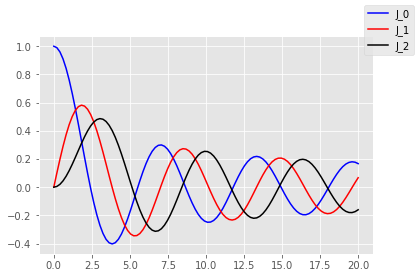

In [14]:
x = np.linspace(0,20,100)
J0 = [J(0,xx) for xx in x]
J1 = [J(1,xx) for xx in x]
J2 = [J(2,xx) for xx in x]

fig, ax = plt.subplots()

ax.plot(x, J0,c = "b", label = "J_0")
ax.plot(x, J1, c = "r", label = "J_1")
ax.plot(x, J2, c = "black", label = "J_2")

fig.legend()

In [113]:
def r(x,y):
    return np.sqrt(x**2 + y**2)

x = np.linspace(-1*10**-6, 1*10**-6,50)

data = np.zeros([len(x), len(x)])
data = pd.DataFrame(data, columns = x, index = x)
data = data.iloc[1:]
data = data.iloc[:,1:]
k = 2*np.pi/(500*10**-9)

for xx in x[1:]:
    for yy in x[1:]:
        r_ = r(xx,yy)
        if r_ == 0:
            data.loc[xx,yy] = 1/2
        else:    
            data.loc[xx,yy] = (J(1,k * r_)/(k * r_))**2

,-9.591837e-07,-9.183673e-07,-8.775510e-07,-8.367347e-07,-7.959184e-07,-7.551020e-07,-7.142857e-07,-6.734694e-07,-6.326531e-07,-5.918367e-07,...,6.326531e-07,6.734694e-07,7.142857e-07,7.551020e-07,7.959184e-07,8.367347e-07,8.775510e-07,9.183673e-07,9.591837e-07,1.000000e-06
-9.591837e-07,0.000038,0.000006,2.591851e-06,0.000033,8.650165e-05,0.000144,1.846744e-04,0.000194,1.705267e-04,1.240153e-04,...,1.705267e-04,0.000194,1.846744e-04,0.000144,8.650165e-05,0.000033,2.591851e-06,0.000006,0.000038,7.882381e-05
-9.183673e-07,0.000006,0.000003,3.704882e-05,0.000096,1.551953e-04,0.000191,1.888378e-04,0.000151,9.363405e-05,3.824714e-05,...,9.363405e-05,0.000151,1.888378e-04,0.000191,1.551953e-04,0.000096,3.704882e-05,0.000003,0.000006,3.974831e-05
-8.775510e-07,0.000003,0.000037,9.885215e-05,0.000160,1.932343e-04,0.000183,1.347154e-04,0.000070,1.811152e-05,1.368808e-07,...,1.811152e-05,0.000070,1.347154e-04,0.000183,1.932343e-04,0.000160,9.885215e-05,0.000037,0.000003,8.216014e-06
-8.367347e-07,0.000033,0.000096,1.603102e-04,0.000194,1.792635e-04,0.000124,5.552312e-05,0.000008,5.533865e-06,5.501867e-05,...,5.533865e-06,0.000008,5.552312e-05,0.000124,1.792635e-04,0.000194,1.603102e-04,0.000096,0.000033,1.053558e-06
-7.959184e-07,0.000087,0.000155,1.932343e-04,0.000179,1.203400e-04,0.000048,3.459425e-06,0.000014,8.246997e-05,1.885919e-04,...,8.246997e-05,0.000014,3.459425e-06,0.000048,1.203400e-04,0.000179,1.932343e-04,0.000155,0.000087,2.436545e-05
-7.551020e-07,0.000144,0.000191,1.829384e-04,0.000124,4.839031e-05,0.000002,1.913033e-05,0.000101,2.201490e-04,3.311189e-04,...,2.201490e-04,0.000101,1.913033e-05,0.000002,4.839031e-05,0.000124,1.829384e-04,0.000191,0.000144,7.149772e-05
-7.142857e-07,0.000185,0.000189,1.347154e-04,0.000056,3.459425e-06,0.000019,1.077890e-04,0.000236,3.491953e-04,3.996151e-04,...,3.491953e-04,0.000236,1.077890e-04,0.000019,3.459425e-06,0.000056,1.347154e-04,0.000189,0.000185,1.266732e-04
-6.734694e-07,0.000194,0.000151,7.043638e-05,0.000008,1.367048e-05,0.000101,2.359653e-04,0.000355,4.001320e-04,3.508068e-04,...,4.001320e-04,0.000355,2.359653e-04,0.000101,1.367048e-05,0.000008,7.043638e-05,0.000151,0.000194,1.719059e-04
-6.326531e-07,0.000171,0.000094,1.811152e-05,0.000006,8.246997e-05,0.000220,3.491953e-04,0.000400,3.442756e-04,2.106525e-04,...,3.442756e-04,0.000400,3.491953e-04,0.000220,8.246997e-05,0.000006,1.811152e-05,0.000094,0.000171,1.937985e-04
-5.918367e-07,0.000124,0.000038,1.368808e-07,0.000055,1.885919e-04,0.000331,3.996151e-04,0.000351,2.106525e-04,6.215784e-05,...,2.106525e-04,0.000351,3.996151e-04,0.000331,1.885919e-04,0.000055,1.368808e-07,0.000038,0.000124,1.875472e-04


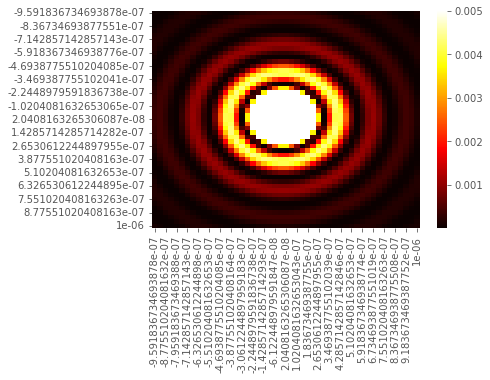

In [240]:
sns.heatmap(data, vmax = 0.005, cmap = "hot")
data

In [228]:
def funcao3(x):
    return (x**4 - 2*x + 1)

def trapezio2(a,b,n):
    step = (b-a)/n
    sum = 0
    for i in np.arange(a,b,step):
        sum += (funcao3(i) + funcao3(i+step))*(step)/2
    return sum

In [229]:
valor = trapezio2(0,2,20)
erro = 1/3 * abs(trapezio2(0,2,20) - trapezio2(0,2,10))
print(valor, erro)

4.426660000000002 0.026633333333332843


In [238]:
def funcao4(x):
    return (np.sin(np.sqrt(100*x)))**2
    
def trapezio4(a,b,d,n):
    step1 = (a-b)/n
    step2 = (a-b)/(n/2)
    sum1 = 0
    for i in np.arange(a,b,step1):
        sum1 += (funcao4(i) + funcao4(i+step1))*(step1)/2
        
    sum2 = 0
    for i in np.arange(a,b,step2):
        sum1 += (funcao4(i) + funcao4(i+step2))*(step2)/2
    
    if 1/3 * abs(sum2 - sum1) > d:
        print(f"int: {n}, estimativa: {sum1}, erro: {1/3 * abs(sum2 - sum1)}")
        return trapezio(a,b,d,n*2)
    else:
        return sum1,sum2
        

In [239]:
trapezio4(0,1,10**-6,2)

(0, 0)